In [1]:
import random
import string
import os
import math
import time
import numpy as np
import cv2
from numpy import asarray
from matplotlib import pyplot

In [2]:
def keyInterpolation(key, size):
    letters = ['a', 'b', 'c', 'd','e',
              'f', 'g', 'h', 'i','j',
              'k','l','m','n','o',
              'p','q','r','s','t',
              'u','v','w','x','y','z']
      
    key = key.lower().strip()
    length= len(key)
    while (length<math.sqrt(size)):
        length = length * 2 
    cardinal = ((letters.index(key[0]))+1) % 4 
    spin = ((letters.index(key[1]))+1) % 2
    lenc = (len(key) - 2) //2 # was -3 // size
    start = 2 # was 3 // size
    end = start + lenc
    coordinates = [1 for i in range (0,2)]
    for i in range (0, 2):
        for j in range (start,end):
            coordinates[i] *= (letters.index(key[j])+1)
        coordinates[i] = coordinates[i] % length
        start=end
        end = start + lenc
        
    return length, cardinal, spin, coordinates

In [3]:
def keyInterpolationImage(key,length):
    letters = ['a', 'b', 'c', 'd','e',
              'f', 'g', 'h', 'i','j',
              'k','l','m','n','o',
              'p','q','r','s','t',
              'u','v','w','x','y','z']
      
    key = key.lower().strip()
    cardinal = ((letters.index(key[0]))+1) % 4 
    spin = ((letters.index(key[1]))+1) % 2
    lenc = (len(key) - 2) //2 # was -3 // size
    start = 2 # was 3 // size
    end = start + lenc
    coordinates = [1 for i in range (0,2)]
    for i in range (0, 2):
        for j in range (start,end):
            coordinates[i] *= (letters.index(key[j])+1)
        coordinates[i] = coordinates[i] % length
        start=end
        end = start + lenc
        
    return cardinal, spin, coordinates

In [4]:
# Cascade Spin Shuffle (CSS) Encryption
def encryptCSS(text, padding, o1, o2, o3, o4):
    length, cardinal, spin, coordinates = o1, o2, o3, o4
    n = len(text)
    p = len(padding)
    total = n+p
    text = text+padding
    directions = [[1,0,-1,0],[0,1,0,-1]]         
    
    # ColumnDirection
    cardinalDirect =  [val [cardinal] for val in directions]
        
    series=1
    step =0
    
    grid = [['\n' for i in range (length)]
                   for j in range (length)]
   
    # fill current cell
    currentCell= coordinates        
    x=currentCell[0]
    y=currentCell[1]            
    grid[x][y]= text[step]  
    
    step+=1
    stablePeriod= (int((series + 1)/2)) 

    while (step < total):
        i=0
        while (i<stablePeriod and step < total):
            if(spin == 0):
                #nextCell = (currentCell + cardinalDirect) % 4 # check this
                nextCell = [a+b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
            else:
                #nextCell = (currentCell - cardinalDirect) % 4 # check this
                nextCell = [a-b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
                
            currentCell = nextCell
            # fill current cell
            x=currentCell[0]
            y=currentCell[1]
            
            grid[x][y]= text[step]
            
            step+=1
            i+=1
        series+=1
        # ccalculate period
        stablePeriod= (int((series + 1)/2)) 
        # change direction
        #cardinal+=1
        if(spin == 0):
            cardinal = (cardinal + 1) % 4
        else:
            cardinal = (cardinal - 1) % 4
        
        # ColumnDirection
        cardinalDirect =  [val [cardinal] for val in directions]
    
    # Reed the grid
    result = []
    for i in range (0,length):
          for j in range (0,length):
                if (grid[i][j] != '\n'):
                    result.append(grid[i][j])
    return("" . join(result))

In [5]:
# Cascade Spin Shuffle (CSS) Decryption
def decryptCSS(cipher, o1, o2, o3, o4):
    length, initcardinal, spin, coordinates = o1, o2, o3, o4
    total = len(cipher)
    
    grid = [['\n' for i in range (length)]
                   for j in range (length)]

    
    directions = [[1,0,-1,0],[0,1,0,-1]]         
    
    # fill current cell
    currentCell= coordinates        
    x=currentCell[0]
    y=currentCell[1]            
    grid[x][y]= '*'
    
    
    # ColumnDirection
    cardinal =initcardinal
    cardinalDirect =  [val [cardinal] for val in directions]
    
    series=1
    stablePeriod= (int((series + 1)/2)) 

    # mark the places with '*'
    step =1
    while (step < total):
        i=0
        while (i<stablePeriod and step < total):
            if(spin == 0):
                #nextCell = (currentCell + cardinalDirect) % 4 # check this
                nextCell = [a+b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
            else:
                #nextCell = (currentCell - cardinalDirect) % 4 # check this
                nextCell = [a-b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
                
            currentCell = nextCell
            # fill current cell
            x=currentCell[0]
            y=currentCell[1]
            
            grid[x][y]= '*'
            
            step+=1
            i+=1
        series+=1
        # ccalculate period
        stablePeriod= (int((series + 1)/2)) 
        # change direction
        #cardinal+=1
        if(spin == 0):
            cardinal = (cardinal + 1) % 4
        else:
            cardinal = (cardinal - 1) % 4
        
        # ColumnDirection
        cardinalDirect =  [val [cardinal] for val in directions]
    

    # now we can fill the grid
    index = 0
    for i in range(length):
        for j in range(length):
            if ((grid[i][j] == '*') and (index < total)):
                grid[i][j] = cipher[index]
                index += 1

    # now read the matrix and construct the resultant text
    result =[]
    
    # fill current cell
    currentCell= coordinates        
    x=currentCell[0]
    y=currentCell[1]            
    result.append(grid[x][y]) 
    
    # ColumnDirection
    cardinal =initcardinal
    cardinalDirect =  [val [cardinal] for val in directions]
    
    step=1
    series=1
    stablePeriod= (int((series + 1)/2)) 

    while (step < total):
        i=0
        while (i<stablePeriod and step < total):
            if(spin == 0):
                #nextCell = (currentCell + cardinalDirect) % 4 # check this
                nextCell = [a+b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
            else:
                #nextCell = (currentCell - cardinalDirect) % 4 # check this
                nextCell = [a-b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
                
            currentCell = nextCell
            # fill current cell
            x=currentCell[0]
            y=currentCell[1]
            
            result.append(grid[x][y]) 
            
            step+=1
            i+=1
        series+=1
        # ccalculate period
        stablePeriod= (int((series + 1)/2)) 
        # change direction
        #cardinal+=1
        if(spin == 0):
            cardinal = (cardinal + 1) % 4
        else:
            cardinal = (cardinal - 1) % 4
        
        # ColumnDirection
        cardinalDirect =  [val [cardinal] for val in directions]
    
    return("" . join(result))

In [6]:
# Cascade Spin Shuffle (CSS) Image Encryption 
def encryptImageCSS(imagePath, Path, o1, o2, o3):
    
    os.chdir(Path)
    imagePath = f"{Path}/{imagePath}"
    
    data = cv2.imread(imagePath)

    cardinal, spin, coordinates = o1, o2, o3
    
    data = data.tolist()
    length = len(data) 
    total = len(data) * len(data[0])
        
    directions = [[1,0,-1,0],[0,1,0,-1]]         
    
        
    series=1
    step =0
    
    
    grid = [[0 for i in range (len(data))]
                for j in range (len(data[0]))]
   
    # fill current cell
    currentCell= coordinates        
    x=currentCell[0]
    y=currentCell[1]            
    grid[step//len(data[0])][step%len(data[0])]= data[x][y] 
    
    step+=1
    stablePeriod= (int((series + 1)/2)) 
    
    
    # ColumnDirection
    cardinalDirect =  [val [cardinal] for val in directions]
    
    while (step < total):
        i=0
        while (i<stablePeriod and step < total):
            if(spin == 0):
                #nextCell = (currentCell + cardinalDirect) % 4 # check this
                nextCell = [a+b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
            else:
                #nextCell = (currentCell - cardinalDirect) % 4 # check this
                nextCell = [a-b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
                
            currentCell = nextCell
            # fill current cell
            x=currentCell[0]
            y=currentCell[1]
            
            grid[step//len(data[0])][step%len(data[0])]= data[x][y] 
            
            step+=1
            i+=1
        series+=1
        # ccalculate period
        stablePeriod= (int((series + 1)/2)) 
        # change direction
        #cardinal+=1
        if(spin == 0):
            cardinal = (cardinal + 1) % 4
        else:
            cardinal = (cardinal - 1) % 4
        
        # ColumnDirection
        cardinalDirect =  [val [cardinal] for val in directions]
    
    
    grid = np.array(grid)
    #image2 = Image.fromarray(grid)
    
    return(grid)

In [7]:
# Cascade Spin Shuffle (CSS) Image Decryption
def decryptImageCSS(cipherImagePath, Path, o1, o2, o3):
    
    os.chdir(Path)
    cipherImagePath = f"{Path}/{cipherImagePath}"
    
    # load the image
    data = cv2.imread(cipherImagePath)
    
    cardinal, spin, coordinates = o1, o2, o3

    data = data.tolist()
    length = len(data) 
    total = len(data) * len(data[0])

    directions = [[1,0,-1,0],[0,1,0,-1]]         

   
    series=1
    step =0

    # length is not utilized 
    
    
    #grid = data.copy()
    grid = [[0 for i in range (len(data))]
            for j in range (len(data[0]))]

    # fill current cell
    currentCell= coordinates        
    x=currentCell[0]
    y=currentCell[1]            
    grid[x][y] = data[step//len(data[0])][step%len(data[0])]
    
    #print(str(step)+" "+ str(x)+" "+str(y)+" "+ str(step%len(data[0]))+" "+str(step//len(data[0])))

    step+=1
    stablePeriod= (int((series + 1)/2)) 
    
     # ColumnDirection
    cardinalDirect =  [val [cardinal] for val in directions]

    while (step < total):
        i=0
        while (i<stablePeriod and step < total):
            if(spin == 0):
                #nextCell = (currentCell + cardinalDirect) % 4 # check this
                nextCell = [a+b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]
            else:
                #nextCell = (currentCell - cardinalDirect) % 4 # check this
                nextCell = [a-b for a, b in zip(currentCell,cardinalDirect)]
                nextCell = [item % length for item in nextCell]

            currentCell = nextCell
            # fill current cell
            x=currentCell[0]
            y=currentCell[1]

            grid[x][y] = data[step//len(data[0])][step%len(data[0])]
            #print(str(step)+" "+ str(x)+" "+str(y)+" "+ str(step%len(data[0]))+" "+str(step//len(data[0])))


            step+=1
            i+=1
        series+=1
        # ccalculate period
        stablePeriod= (int((series + 1)/2)) 
        # change direction
        #cardinal+=1
        if(spin == 0):
            cardinal = (cardinal + 1) % 4
        else:
            cardinal = (cardinal - 1) % 4

        # ColumnDirection
        cardinalDirect =  [val [cardinal] for val in directions]


    grid = np.array(grid)
    #image2 = Image.fromarray(grid)
    
    return(grid)

In [8]:
# Generate File of Random Charachters
def generateFile(filename, Path, size):
    os.chdir(Path)
    file_path = f"{Path}/{filename}"  
    chars = ''.join([random.choice(string.ascii_letters) for i in range(size)]) 
    with open(file_path, 'w') as f:
        f.write(chars)

In [9]:
# Save Text into a File
def saveFile(filename, Path, text):
    os.chdir(Path)
    file_path = f"{Path}/{filename}"
    #open text file
    text_file = open(file_path, "w")
    #write string to file
    text_file.write(text)
 
    #close file
    text_file.close()

In [10]:
def readImage(filename, Path):
    os.chdir(Path)
    file_path = f"{Path}/{filename}"
    im = cv2.imread(file_path)
    data = im.tolist()
    grid = np.array(data)
    #cv2.imwrite('test.jpg', grid)
    return grid

#     # convert image to numpy array
#     data = asarray(image)
#     data = data.tolist()
#     grid = np.array(data)
#     image = Image.fromarray(grid)
#     return image

In [11]:
def saveImage(filename, Path, Image):
    os.chdir(Path)
    file_path = f"{Path}/{filename}"
    cv2.imwrite(file_path, Image)


In [12]:
def randomlyModifyString(text, numChanges):
    output = text
    for i in range (numChanges):
        charc = random.choice(string.ascii_letters)
        pos = random.randrange(len(output))
        templist = list(output)
        templist[pos] = charc
        output = ''.join(templist)   
    return output

In [13]:
def generateString(length):
    chars = ''.join([random.choice(string.ascii_letters) for i in range(length)]) 
    return chars

In [14]:
def readFile(filename, Path):
    os.chdir(Path)
    file_path = f"{Path}/{filename}"
    
    f = open(file_path,'r')
    return f.read()

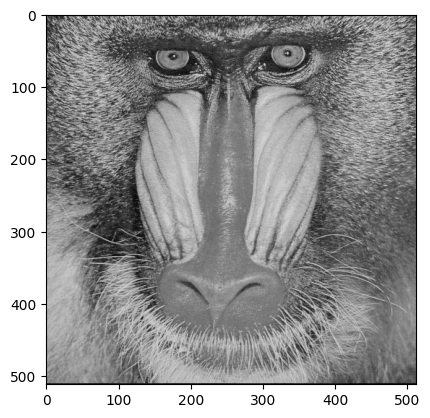

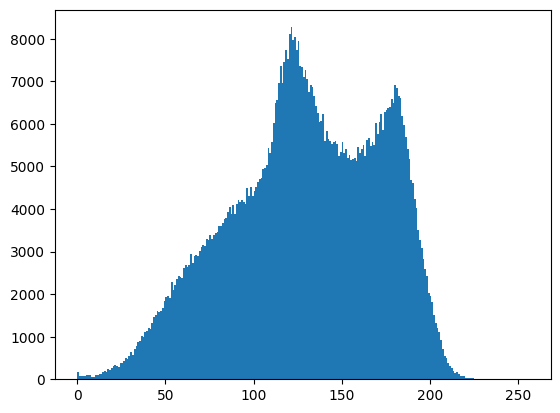

In [21]:
Path = "D:/PythonProjects/Data/Encryption/CSSKS2"
ImagePath ="D:/PythonProjects/Data/Encryption/CSS/Initial"

### Sample Encrption and Decreption of String 
# o1, o2, o3, o4 = keyInterpolation("creditcard", 25)
# print(encryptCSS("This is a sample text", "", o1, o2, o3, o4))
# print(decryptCSS("shTieais tmple t a sx", o1, o2, o3, o4))

### Sample Encrption of File of specific size 
# fileSize = 1024*10
# keySize = 20
# plainName ="Plain-1.txt"
# cipherName = "Cipher-1.txt"
# plainName2 ="Plain-2.txt"
# generateFile(plainName,Path,fileSize)
# plainText = readFile(plainName, Path)
# key=generateString(keySize)
# o1, o2, o3, o4 = keyInterpolation(key, fileSize)
# cipherText=encryptCSS(plainText, "", o1, o2, o3, o4)
# saveFile(cipherName, Path ,cipherText)
# plainText2=decryptCSS(cipherText, o1, o2, o3, o4)
# saveFile(plainName2, Path ,plainText2)

### Sample Encrption and Decreption of Image 
keySize = 120
key=generateString(keySize)
image="BaboonGray.jpg"
cipherImagePath ="BaboonGrayEncrypted.jpg"
imagePath = f"{ImagePath}/{image}"
data = cv2.imread(imagePath)
o1, o2, o3 = keyInterpolationImage(key, len(data))
image=encryptImageCSS(image, ImagePath, o1, o2, o3)
saveImage("BaboonGrayEncrypted.jpg", ImagePath, image)
image2=decryptImageCSS(cipherImagePath,ImagePath, o1, o2, o3)
saveImage("BaboonGenerated.jpg", ImagePath, image2)
pyplot.imshow(image2)
pyplot.show()
pyplot.hist(image2.ravel(),256,[0,256])
pyplot.show()

### Encrption of 10,000 Files of Specific Size  
# fileSize = 1024*10
# keySize = 120
# for i in range (1, 10001):
#     plainName = "Plain-"+str(i)+".txt"
#     cipherName= "Cipher-"+str(i)+".txt"
#     generateFile(plainName, Path, fileSize)
#     plainText = readFile(plainName, Path)
#     key=generateString(keySize)
#     o1, o2, o3, o4 = keyInterpolation(key, fileSize)
#     cipherText=encryptCSS(plainText, "", o1, o2, o3, o4)
#     saveFile(cipherName, Path, cipherText)

### Encrption of 10,000 Files Using Mutated PlainText
# fileSize = 1024*10
# keySize = 120
# for i in range (1, 10001):
#     plainName1 = "Plain1-"+str(i)+".txt"
#     plainName2 = "Plain2-"+str(i)+".txt"
#     cipherName1= "Cipher1-"+str(i)+".txt"
#     cipherName2= "Cipher2-"+str(i)+".txt"
#     generateFile(plainName1,Path, fileSize)
#     plainText1 = readFile(plainName1,Path)
#     plainText2 = randomlyModifyString(plainText1, 1)
#     key=generateString(keySize)
#     o1, o2, o3, o4 = keyInterpolation(key, fileSize)
#     cipherText1=encryptCSS(plainText1, "",o1, o2, o3, o4)
#     saveFile(cipherName1, Path, cipherText1)
#     cipherText2=encryptCSS(plainText2, "",o1, o2, o3, o4)
#     saveFile(cipherName2, Path, cipherText2)


### Encrption of 10,000 Files Using Mutated Keys
# fileSize = 1024*10
# keySize = 20
# for i in range (1, 10001):
#     plainName1 = "Plain1-"+str(i)+".txt"
#     cipherName1= "Cipher1-"+str(i)+".txt"
#     cipherName2= "Cipher2-"+str(i)+".txt"
#     generateFile(plainName1,Path, fileSize)
#     plainText1 = readFile(plainName1, Path)
#     rand1=generateString(keySize)
#     rand2=randomlyModifyString(rand1, 1)
#     o1, o2, o3, o4 = keyInterpolation(rand1, fileSize)
#     cipherText1=encryptCSS(plainText1, "", o1, o2, o3, o4)
#     saveFile(cipherName1, Path, cipherText1)
#     o1, o2, o3, o4 = keyInterpolation(rand2, fileSize)
#     cipherText2=encryptCSS(plainText1, "", o1, o2, o3, o4)
#     saveFile(cipherName2, Path, cipherText2)

### Encrption of 10,000 Files Using Two Different Keys
# fileSize = 1024*10
# keySize = 20
# for i in range (1, 10001):
#     plainName1 = "Plain1-"+str(i)+".txt"
#     cipherName1= "Cipher1-"+str(i)+".txt"
#     cipherName2= "Cipher2-"+str(i)+".txt"
#     generateFile(plainName1,Path, fileSize)
#     plainText1 = readFile(plainName1,Path)
#     key1=generateString(keySize)
#     key2= generateString(keySize)
#     o1, o2, o3, o4 = keyInterpolation(key1, fileSize)
#     cipherText1=encryptCSS(plainText1, "",o1, o2, o3, o4)
#     saveFile(cipherName1, Path, cipherText1)
#     o1, o2, o3, o4 = keyInterpolation(key2, fileSize)
#     cipherText2=encryptCSS(plainText1, "",o1, o2, o3, o4)
#     saveFile(cipherName2, Path, cipherText2)


## Sample Encryption and Decryption of File for Performance Evaluation
# fileSize = 1024*1024*10
# keySize = 20
# Path = "D:/PythonProjects/Data/Encryption/Performance"
# plainName = "Plain-1.txt"
# cipherName= "Cipher-1.txt"
# generateFile(plainName,Path, fileSize)
# plainText = readFile(plainName,Path)
# key=generateString(keySize)
# start_time = time.time()
# o1, o2, o3, o4 = keyInterpolation(key, fileSize)
# print("--- %s Interpolation seconds ---" % (time.time() - start_time))
# start_time = time.time()
# cipherText=encryptCSS(plainText, "", o1, o2, o3, o4)
# print("--- %s Encryption seconds ---" % (time.time() - start_time))
# saveFile(cipherName, Path, cipherText)
# start_time = time.time()
# plainText=decryptCSS(cipherText, o1, o2, o3, o4)
# print("--- %s Decryption seconds ---" % (time.time() - start_time))